# EXPLANATION
This script performs GWAS on a pre-selected number of variants (in Plink binary format) and on a specific phenotype you want. Ideally, the phenotype has been adjusted for inversions, infection, and also log-transformed if the raw phenotype wasn't deemed normally distributed.

BEWARE: You should format your phenotype line IDs in the same way as denoted in the .fam variant file you are using.

 # Time measurement


In [1]:
import time
start = time.clock()

# Importing, general preparations

In [2]:
import os
os.chdir('FaST_LMM')

from fastlmm.association import single_snp
from fastlmm.inference.fastlmm_predictor import _snps_fixup, _pheno_fixup, _kernel_fixup, _SnpTrainTest
from random import shuffle
import numpy as np
import pandas as pd
import time
import os
# We're going to need PySnpTools, to do permutations, because we can shuffle bed files by varint using Bed
import sys
sys.path.append('../PySnpTools')
from pysnptools.snpreader import Bed
from shutil import copyfile

C:\Users\micha\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\micha\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# CONSTANTS 

In [3]:
# Permutation info
NUMBER_OF_PERMUTATIONS = 0
# Where you want to save your phenotype
OUTPUT_NAME = '../Outputs/GWASMay'

# INPUTS 

In [4]:
# Phenotype data to test
#phenotype_data = '../Outputs/Fast-Lmm-Input-Interocular-Distance-Vonesch2016-Female.txt'
phenotype_data = '../Outputs/Fast-Lmm-Input-Mass-Female.txt'
#phenotype_data = '../Outputs/Dgrp2-AllLines-RandomPheno-for-Mito.txt'
#phenotype_data = '../Outputs/T5-Pheno-for-Fast-Lmm-DGRPFormat.txt'
#phenotype_data = '../Outputs/T5-Pheno-for-Fast-Lmm.txt'


# Variants to test your phenotype on
#variants_to_test = '../Outputs/MitoSeq_AllRuns_dm6_chrM.annot.biallellic_ConvertedReference'
#variants_to_test = '../Data/dgrp2'
#variants_to_test = '../Outputs/Plinkfiles/DGRP2Chr2R'
variants_to_test = '../Outputs/MassVariants_MAF5'
#variants_to_test = '../Outputs/Plinkfiles/Dgrp2-CSLines-Maf5'


# ACTUAL GWAS =================================================================

# Clearing cache
# This ensures that the relationship matrix is recalculated for each phenotype.
try:
    os.remove('Outputs/Fast-Lmm-Cache/Gwas-Permutations-Cache.npz')
except OSError:
    pass



# Performing GWAS on the real phenotype:

time_0 = time.time()
results_df = single_snp(variants_to_test,  phenotype_data,
                        cache_file='Outputs/Fast-Lmm-Cache/Gwas-Permutations-Cache.npz',
                        leave_out_one_chrom=False,
                        save_test_statistic=True,
                        output_file_name = OUTPUT_NAME + '-Original.txt',
                        )
time_1 = time.time()

print('Time for full GWAS:' + str(time_1 - time_0) + 's')
print 'Total time: ' + str(time.clock()-start)

C:\Users\micha\Anaconda2\lib\site-packages\pysnptools-0.3.13-py2.7-win-amd64.egg\pysnptools\snpreader\bed.py:42: FutureWarning: 'count_A1' was not set. For now it will default to 'False', but in the future it will default to 'True'
  warnings.warn("'count_A1' was not set. For now it will default to 'False', but in the future it will default to 'True'", FutureWarning)
C:\Users\micha\Anaconda2\lib\site-packages\pysnptools-0.3.13-py2.7-win-amd64.egg\pysnptools\snpreader\snpreader.py:625: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.string_ == np.dtype(str).type`.
  assert np.issubdtype(self._row.dtype, str) and len(self._row.shape)==2 and self._row.shape[1]==2, "iid should be dtype str, have two dimensions, and the second dimension should be size 2"
C:\Users\micha\Anaconda2\lib\site-packages\pysnptools-0.3.13-py2.7-win-amd64.egg\pysnptools\snpreader\snpreader.py:626: FutureWarning: Conversion of the 

NaN beta value seen, may be due to an SNC (a constant SNP)


fastlmm\inference\lmm_cov.py:793: RuntimeWarning: invalid value encountered in divide
  beta = snpsKY / (snpsKsnps + penalty_)
C:\Users\micha\Anaconda2\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
fastlmm\inference\lmm_cov.py:804: RuntimeWarning: divide by zero encountered in divide
  variance_beta = r2 / (N - 1.0) / snpsKsnps


NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SNP)
NaN beta value seen, may be due to an SNC (a constant SN

In [13]:
test_stat = pd.read_csv('../Outputs/Fast-Lmm-Cache/Test-Stat-Cache.txt', header=None)
test_stat = test_stat.replace('[\[\] ]', '', regex=True)
test_stat = pd.to_numeric(test_stat[0])

results_df['Full ID'] = results_df['Chr'].astype('str') + '_' + results_df['ChrPos'].astype('str')
results_df = pd.concat([results_df[['Chr', 'ChrPos', 'SNP', 'Full ID', 'PValue']], test_stat],
                       axis = 1)
results_df.columns = ['Chr', 'ChrPos', 'SNP', 'Full ID', 'PValue', 'F-test statistic']

mybed = Bed(variants_to_test + '.bed')
mysnpdata = mybed.read()

print 'Time: ' + str(time.clock()-start)

Time: 928.9441207


In [14]:
pheno = _pheno_fixup(phenotype_data, count_A1=None).read()
pheno = pheno.val[np.searchsorted(pheno.iid[:,1], mysnpdata.iid[:,1])]
snpdata = mysnpdata.val
diff = range(snpdata.shape[1])
maf = range(snpdata.shape[1])
n_alleles = range(snpdata.shape[1])
mean_major = range(snpdata.shape[1])
for i in range(snpdata.shape[1]):
    ref = [j for j, x in enumerate(snpdata[:,i]) if x == 2]
    alt = [j for j, x in enumerate(snpdata[:,i]) if x == 0]
    meanref = np.mean(pheno[ref])
    meanalt = np.mean(pheno[alt])
    if len(ref) > len(alt):
        diff[i] = meanref - meanalt
        maf[i] = float(len(alt)) / (len(ref) + len(alt))
        n_alleles[i] = len(ref) + len(alt)
        mean_major[i] = meanref
    elif len(ref) + len(alt) == 0:
        diff[i] = float('NaN')
        maf[i] = float('NaN')
        n_alleles[i] = len(ref) + len(alt)
        mean_major[i] = float('NaN')
    else:
        diff[i] = meanalt - meanref
        maf[i] = float(len(ref)) / (len(ref) + len(alt))
        n_alleles[i] = len(ref) + len(alt)
        mean_major[i] = meanalt
        
        
print 'Time: ' + str(time.clock()-start)

Time: 1180.29071287


In [15]:
diff_df = diff_df = pd.DataFrame(data={'MajMinDiff':diff,
                                       'MeanMajor': mean_major,
                                       'MAF':maf,
                                       'NAlleles':n_alleles})
diff_df['SNP'] = mysnpdata.sid
results_df = pd.merge(results_df, diff_df, on='SNP')
    

# PHENOTYPE shuffling/permutation and adding the p-values from the resulting
# GWAS to the results data frame.
#phenotype_to_shuffle = pd.read_table(phenotype_data,
#                                     sep=' ', header=None)
#indices = range(len(phenotype_to_shuffle))
#temp_shuffled_pheno = '../Outputs/Fast-Lmm-Inputs/Temporary-Shuffled-Phenotype.txt'
#
#for i in range(NUMBER_OF_PERMUTATIONS):
#    time_permut_0 = time.time()
#    shuffle(indices)
#    phenotype_shuffled = []
#    for j in range(len(indices)):
#        phenotype_shuffled.append(phenotype_to_shuffle[2][indices[j]])
#    
#    phenotype_to_shuffle[2] = phenotype_shuffled
#    phenotype_to_shuffle.to_csv(temp_shuffled_pheno, header=False, index=False, sep=' ')
#    tmp_shuffled_df = single_snp(variants_to_test,  temp_shuffled_pheno,
##                                cache_file='../Outputs/Fast-Lmm-Cache/Gwas-Permutations-Cache'+str(i)
#                                 cache_file='../Outputs/Fast-Lmm-Cache/Gwas-Permutations-Cache.npz',
#                                 leave_out_one_chrom=False,
#                                 )
#    tmp_shuffled_df['Full ID'] = tmp_shuffled_df['Chr'].astype('str') + '_' + tmp_shuffled_df['ChrPos'].astype('str')
#    
#    # sorting the new df to match the original
#    tmp_shuffled_df = tmp_shuffled_df[['Full ID', 'PValue']]
#    tmp_shuffled_df['PValue'].rename('PValueShuffled'+str(i+1))
#    
#    
#    results_df = pd.merge(results_df, tmp_shuffled_df, on='Full ID')
#    print('Time for permutation GWAS:' + str(time.time() - time_permut_0) + 's')

print 'Time: ' + str(time.clock()-start)

Time: 1183.87121157


In [16]:
# Shuffling ALLELES by VARIANT

for i in range(NUMBER_OF_PERMUTATIONS):
    time_permut_0 = time.time()
    
    # Python works a little different than R: Shuffle directly modifies the input data frame!
    np.random.shuffle(mysnpdata.val)
    Bed.write('VariantsPermuted', mysnpdata)
    copyfile(variants_to_test + '.bim', 'VariantsPermuted.bim')

    tmp_shuffled_df = single_snp('VariantsPermuted',  phenotype_data,
#                                cache_file='../Outputs/Fast-Lmm-Cache/Gwas-Permutations-Cache'+str(i)
                                 cache_file='../Outputs/Fast-Lmm-Cache/Gwas-Permutations-Cache.npz',
                                 leave_out_one_chrom=False,
                                 )
    tmp_shuffled_df['Full ID'] = tmp_shuffled_df['Chr'].astype('str') + '_' + tmp_shuffled_df['ChrPos'].astype('str')
    
    # sorting the new df to match the original
    tmp_shuffled_df = tmp_shuffled_df[['Full ID', 'SNP', 'PValue']]
    tmp_shuffled_df = tmp_shuffled_df.rename(columns={'Full ID':'Full IDShuffled'+str(i+1),
                                                      'PValue':'PValueShuffled'+str(i+1)})
    
    snpdata = mysnpdata.val
    diff = range(snpdata.shape[1])
    maf = range(snpdata.shape[1])
    n_alleles = range(snpdata.shape[1])
    mean_major = range(snpdata.shape[1])
    for k in range(snpdata.shape[1]):
        ref = [j for j, x in enumerate(snpdata[:,k]) if x == 2]
        alt = [j for j, x in enumerate(snpdata[:,k]) if x == 0]
        meanref = np.mean(pheno[ref])
        meanalt = np.mean(pheno[alt])
        if len(ref) > len(alt):
            diff[k] = meanref - meanalt
            maf[k] = float(len(alt)) / (len(ref) + len(alt))
            n_alleles[k] = len(ref) + len(alt)
            mean_major[k] = meanref
        elif len(ref) + len(alt) == 0:
            diff[k] = float('NaN')
            maf[k] = float('NaN')
            n_alleles[k] = len(ref) + len(alt)
            mean_major[k] = float('NaN')
        else:
            diff[k] = meanalt - meanref
            maf[k] = float(len(ref)) / (len(ref) + len(alt))
            n_alleles[k] = len(ref) + len(alt)
            mean_major[k] = meanalt
        
    diff_df = diff_df = pd.DataFrame(data={'MajMinDiffShuffled'+str(i+1):diff,
                                           'MeanMajorShuffled'+str(i+1): mean_major,
                                           'NAllelesShuffled'+str(i+1):n_alleles,
                                           'MAFShuffled'+str(i+1):maf})
    diff_df['SNP'] = mysnpdata.sid
    tmp_shuffled_df = pd.merge(tmp_shuffled_df, diff_df, on='SNP')
    tmp_shuffled_df = tmp_shuffled_df.rename(columns={'SNP':'SNPShuffled'+str(i+1)})
    
#    results_df = pd.merge(results_df, tmp_shuffled_df, on='Full ID')
    results_df = results_df.join(tmp_shuffled_df)
    print('Time for permutation GWAS:' + str(time.time() - time_permut_0) + 's')   
    

print 'Time: ' + str(time.clock()-start)

Time: 1184.02317965


In [17]:
results_df.to_csv(OUTPUT_NAME + '-with-Permutations.txt', sep="\t", index=False)

print 'Time: ' + str(time.clock()-start)

Time: 1198.03445723


# Manhattan Plot

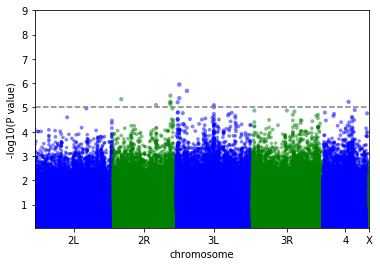

Time: 1484.48883951


In [21]:
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df.as_matrix(["Chr", "ChrPos", "PValue"]),pvalue_line=1e-5,xaxis_unit_bp=False, plot_threshold=1)
pylab.show()

print 'Time: ' + str(time.clock()-start)

# QQ Plot

lambda=0.9994


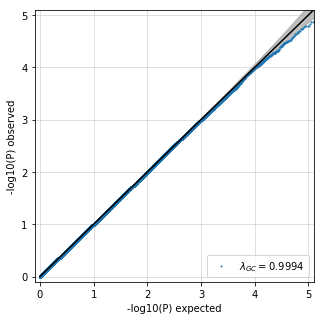

Time: 1571.12554915
lambda=0.9994


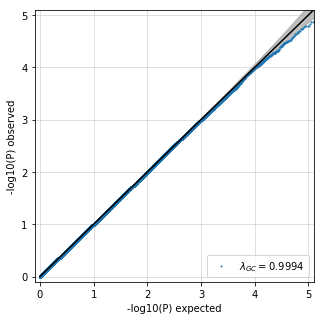

Time: 1623.64985535
lambda=0.9994


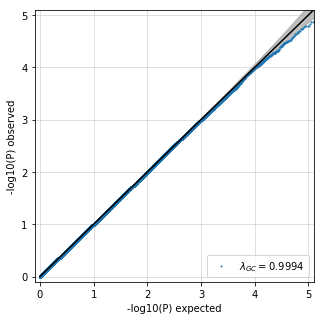

Time: 1674.21644665
lambda=0.9994


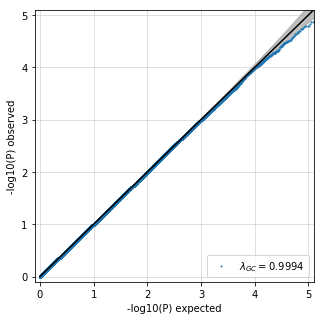

Time: 1725.7739228
1 loop, best of 3: 50.6 s per loop


In [22]:
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])
pylab.show()

print 'Time: ' + str(time.clock()-start)

In [24]:
%ls

print 'Time: ' + str(time.clock()-start)

 Volume in drive C has no label.
 Volume Serial Number is CCC4-F7D4

 Directory of C:\Users\micha\Desktop\GWAS_Pipeline\FaST_LMM

2018-05-13  17:25    <DIR>          .
2018-05-13  17:25    <DIR>          ..
2018-05-13  11:44    <DIR>          .ipynb_checkpoints
2017-11-10  15:42               131 AUTHORS.txt
2018-05-13  11:44    <DIR>          build
2017-11-10  19:26         1 066 822 Cache-Maf5-AllLines-LeaveOutFalse
2017-11-10  19:26           336 752 Cache-Maf5-AllLines-LeaveOutFalse.npz
2017-11-10  19:26             5 304 Cache-Maf5-AllLines-LeaveOutFalseS
2017-10-18  17:04             1 506 Dembeck-Gwas-First-Attempt.py
2017-11-02  10:21             1 136 Dembeck-Gwas-Full.py
2018-05-13  11:44    <DIR>          dist
2018-05-13  11:44    <DIR>          doc
2018-05-13  11:44    <DIR>          docs
2017-11-10  18:06             5 304 eS
2018-05-13  11:44    <DIR>          external
2018-02-02  17:50             2 000 Extract-Genetic-Similarity-Matrices.py
2018-05-13  11:44    <DIR>   

# The end \o/